# Data Wrangling and EDA on Healthcare dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [2]:
Data = pd.read_csv("Healthcare.csv")
Data.head(40)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,TaxAmount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Unnamed: 16
0,Tiffany Ramirez,81,NaN,O-,Diabetes,17/11/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.983360,5623.647505,146.0,Elective,1/12/2022,Aspirin,Inconclusive,6.666666665
1,Ruben Burns,35,Male,O+,Asthma,1/6/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064850,7095.609727,404.0,Emergency,15/06/2023,NaN,Normal,6.666666667
2,Chad Byrd,61,Male,B-,Obesity,9/1/2019,Paul Baker,Walton LLC,Medicare,36874.897000,5531.234549,292.0,Emergency,8/2/2019,Lipitor,Normal,6.666666668
3,Antonio Frederick,49,Male,B-,Asthma,2/5/2020,Brian Chandler,Garcia Ltd,Medicare,23303.322090,3495.498314,480.0,Urgent,3/5/2020,Penicillin,Abnormal,6.666666666
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,9/7/2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344180,2712.951628,477.0,Urgent,2/8/2021,Paracetamol,Normal,6.666666664
5,Patrick Parker,41,Male,AB+,Arthritis,20/08/2020,Robin Green,Boyd PLC,Aetna,22522.363380,3378.354508,180.0,Urgent,23/08/2020,Aspirin,Abnormal,6.666666665
6,Charles Horton,82,Male,AB+,Hypertension,22/03/2021,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435760,5939.015364,161.0,Urgent,15/04/2021,Lipitor,Abnormal,6.666666667
7,Patty Norman,55,Female,O-,Arthritis,16/05/2019,Brian Kennedy,Brown Inc,Blue Cross,NaN,2032.022587,384.0,Elective,2/6/2019,Aspirin,Normalll,0
8,Ryan Hayes,33,Male,A+,Diabetes,17/12/2020,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,3735.455590,215.0,Elective,22/12/2020,Aspirin,Abnormall,6.666666668
9,Sharon Perez,39,Female,O-,Asthma,15/12/2022,Jessica Bailey,Brown-Golden,Blue Cross,22788.236030,3418.235404,310.0,Urgent,16/12/2022,Aspirin,Normal,6.666666668


In [3]:
Data.shape

(10042, 17)

# Data Summary

This dataset appears to contain information of 100042 patients admitted to a healthcare facility.
Each patient record includes demographics (name, age, gender), medical history (conditions), admission and discharge dates, medications, test results, insurance provider, billing info, and admission type (Elective, Urgent, Emergency).


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10042 entries, 0 to 10041
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10042 non-null  object 
 1   Age                 10042 non-null  int64  
 2   Gender              10040 non-null  object 
 3   Blood Type          10042 non-null  object 
 4   Medical Condition   10042 non-null  object 
 5   Date of Admission   10042 non-null  object 
 6   Doctor              10042 non-null  object 
 7   Hospital            10042 non-null  object 
 8   Insurance Provider  10042 non-null  object 
 9   Billing Amount      10041 non-null  float64
 10  TaxAmount           7873 non-null   float64
 11  Room Number         10038 non-null  float64
 12  Admission Type      10042 non-null  object 
 13  Discharge Date      10042 non-null  object 
 14  Medication          10041 non-null  object 
 15  Test Results        10042 non-null  object 
 16  Unna

# Handling Missing Values

In [5]:
#Missing Value count in each colunm
Data.isnull().sum()

Name                      0
Age                       0
Gender                    2
Blood Type                0
Medical Condition         0
Date of Admission         0
Doctor                    0
Hospital                  0
Insurance Provider        0
Billing Amount            1
TaxAmount              2169
Room Number               4
Admission Type            0
Discharge Date            0
Medication                1
Test Results              0
Unnamed: 16           10006
dtype: int64

Following Columns have Missing Values:

- Gender
- Billing Amount
- TaxAmount
- Room Number
- Medication

<Axes: >

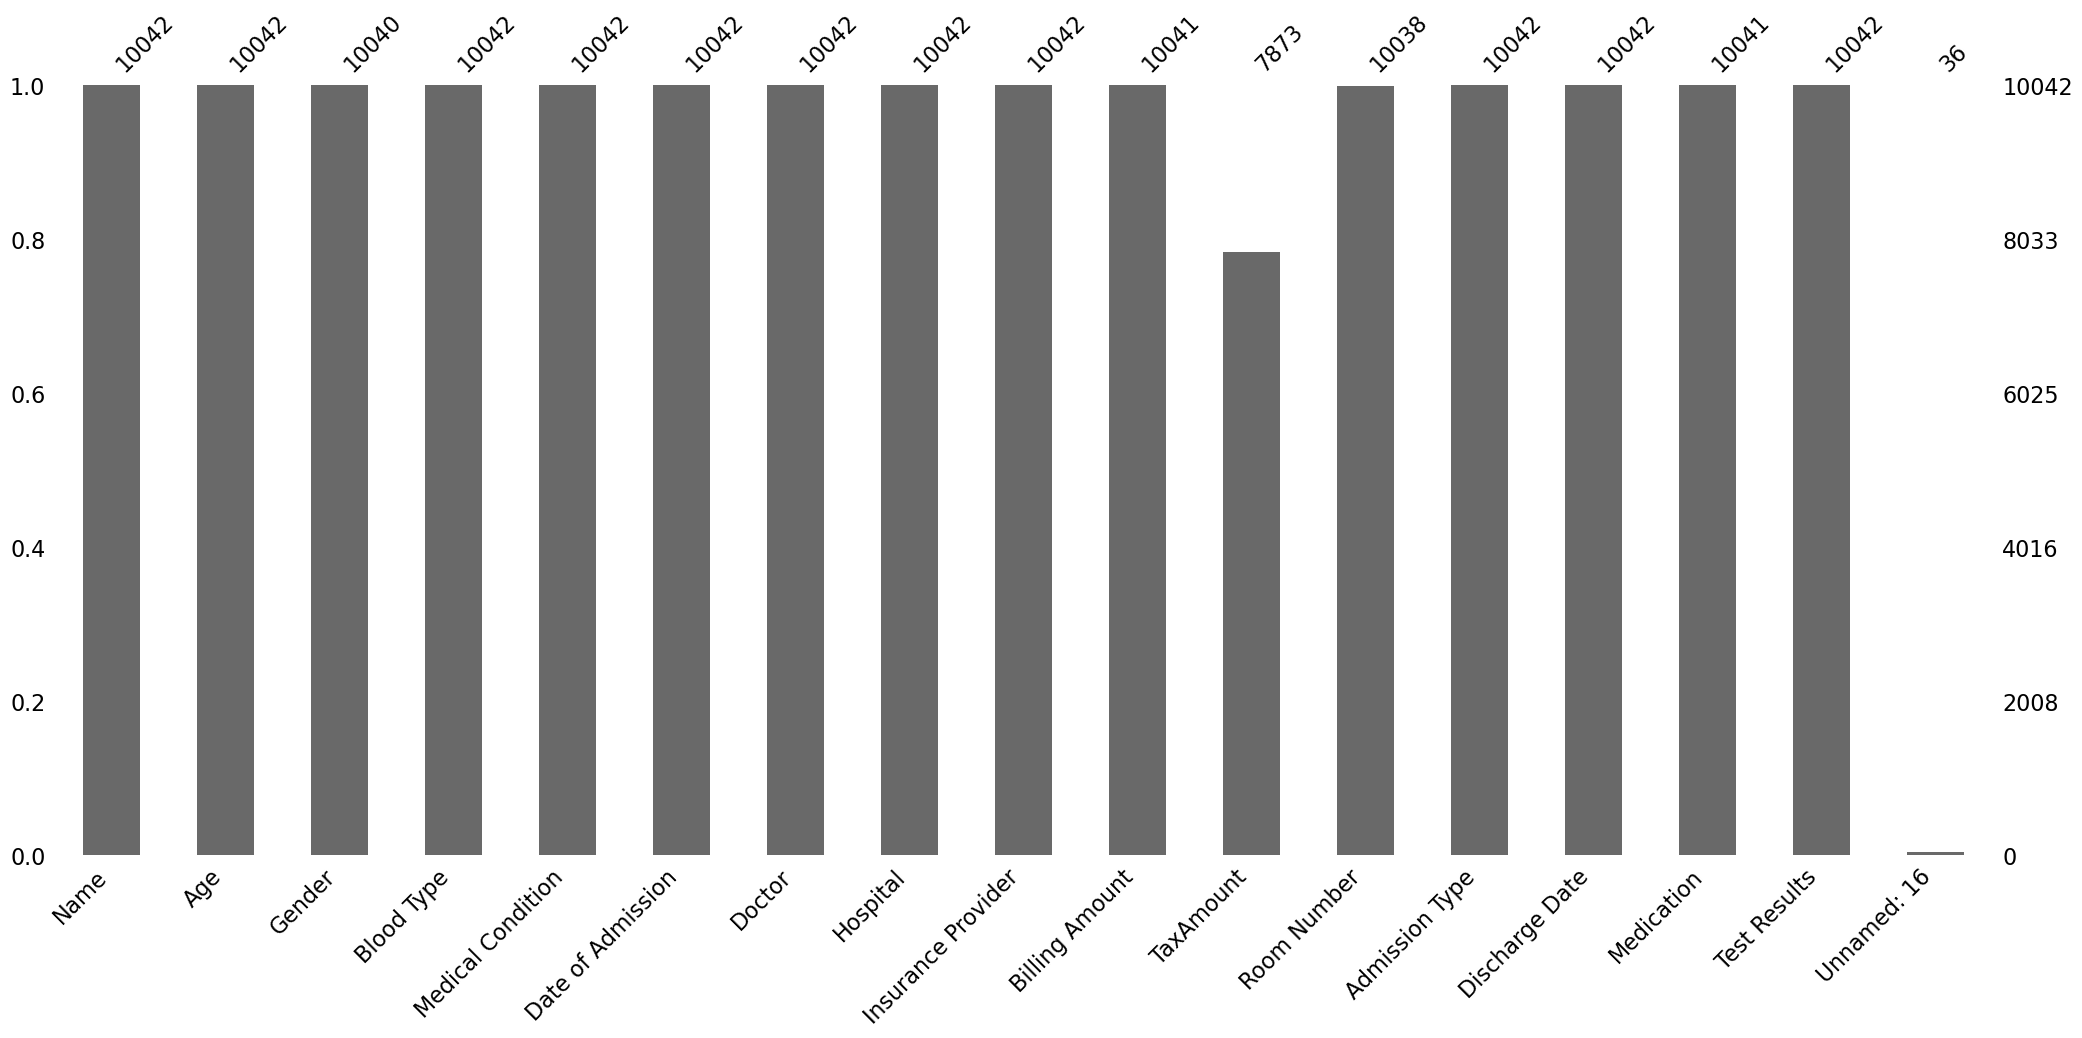

In [6]:
#let's check the completeness of data
mano.bar(Data)


A considerable portion of the TaxAmount data is missing, while only a few values are missing in some other columns.

<Axes: >

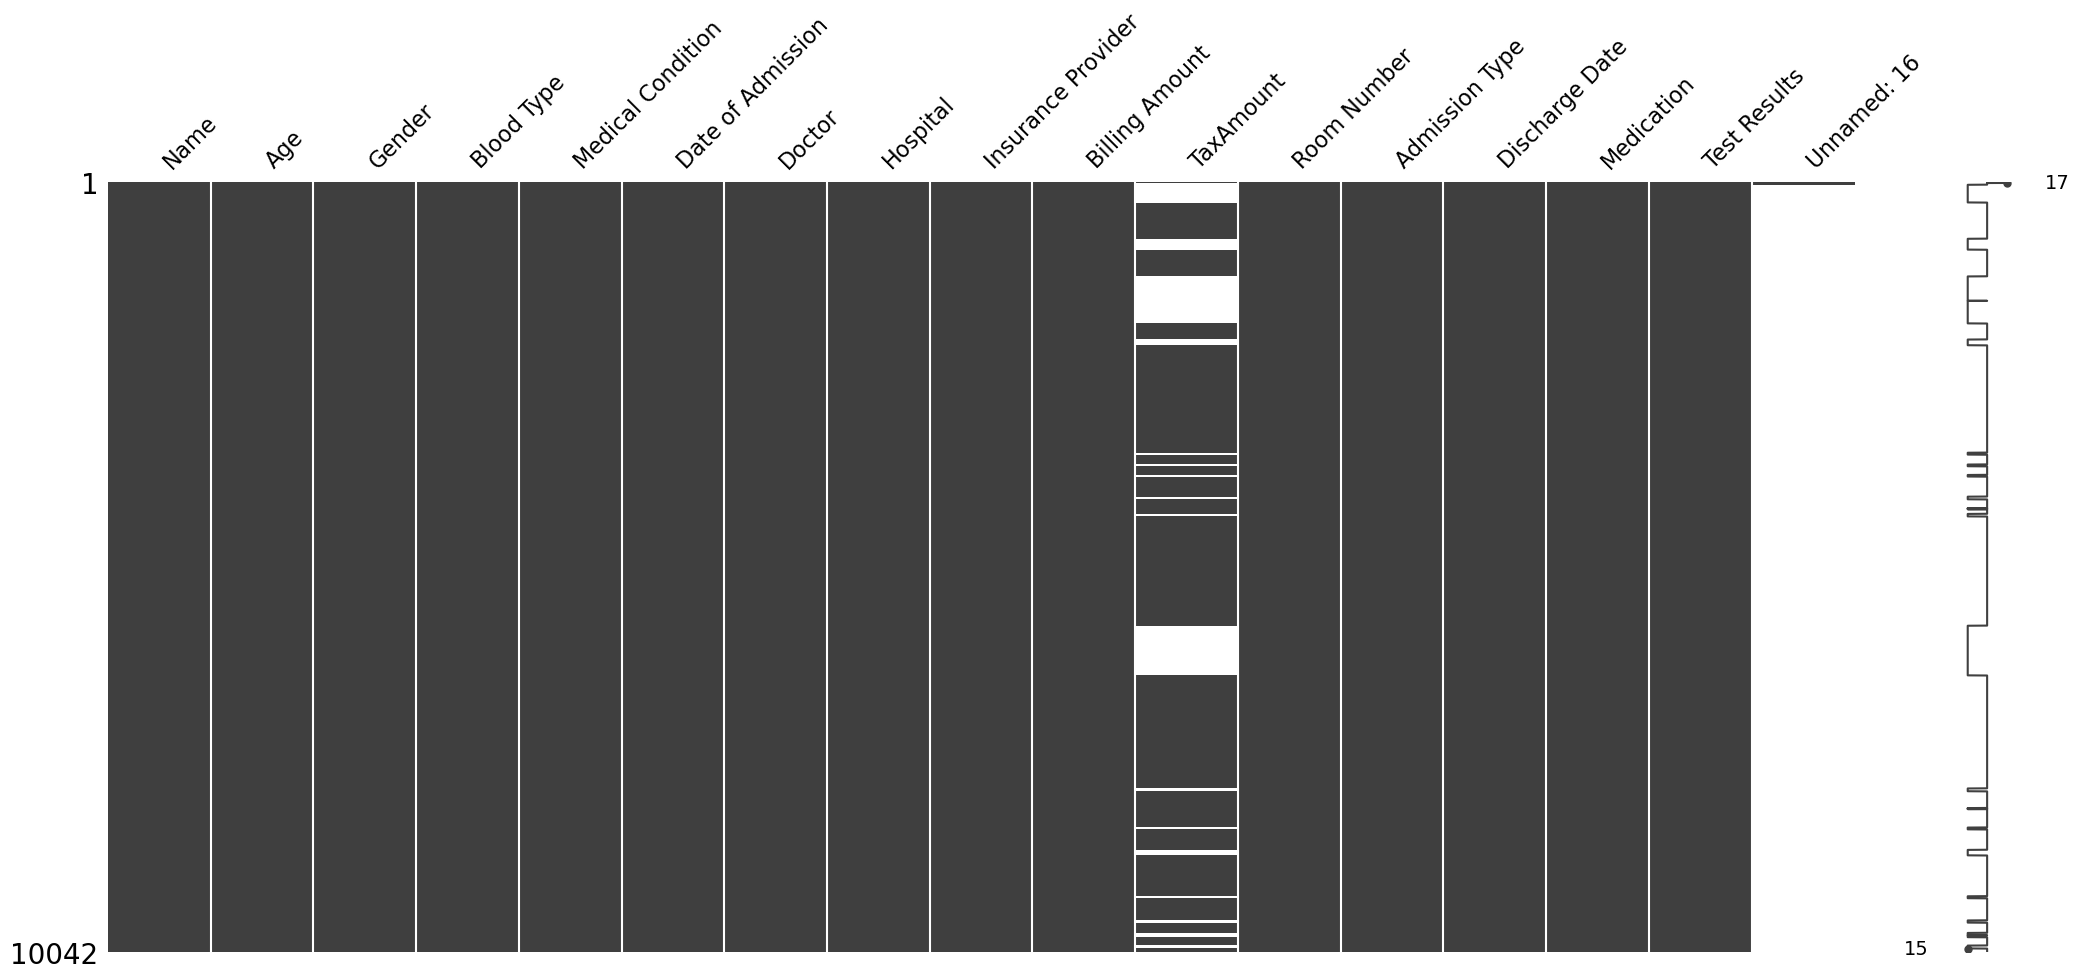

In [7]:
# let's now visualize the location of missing data.
mano.matrix(Data)

It's cleaarly visible that none of the columns have exactly similar missing value patterns. So, none of them is an example of MNAR

In [8]:
# # Drop non-numeric columns
# numeric_data = Data.select_dtypes(include=['number'])

# # Calculate correlation matrix
# correlation_matrix = numeric_data.corr()

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title("Correlation Heatmap")
# plt.show()

<Axes: >

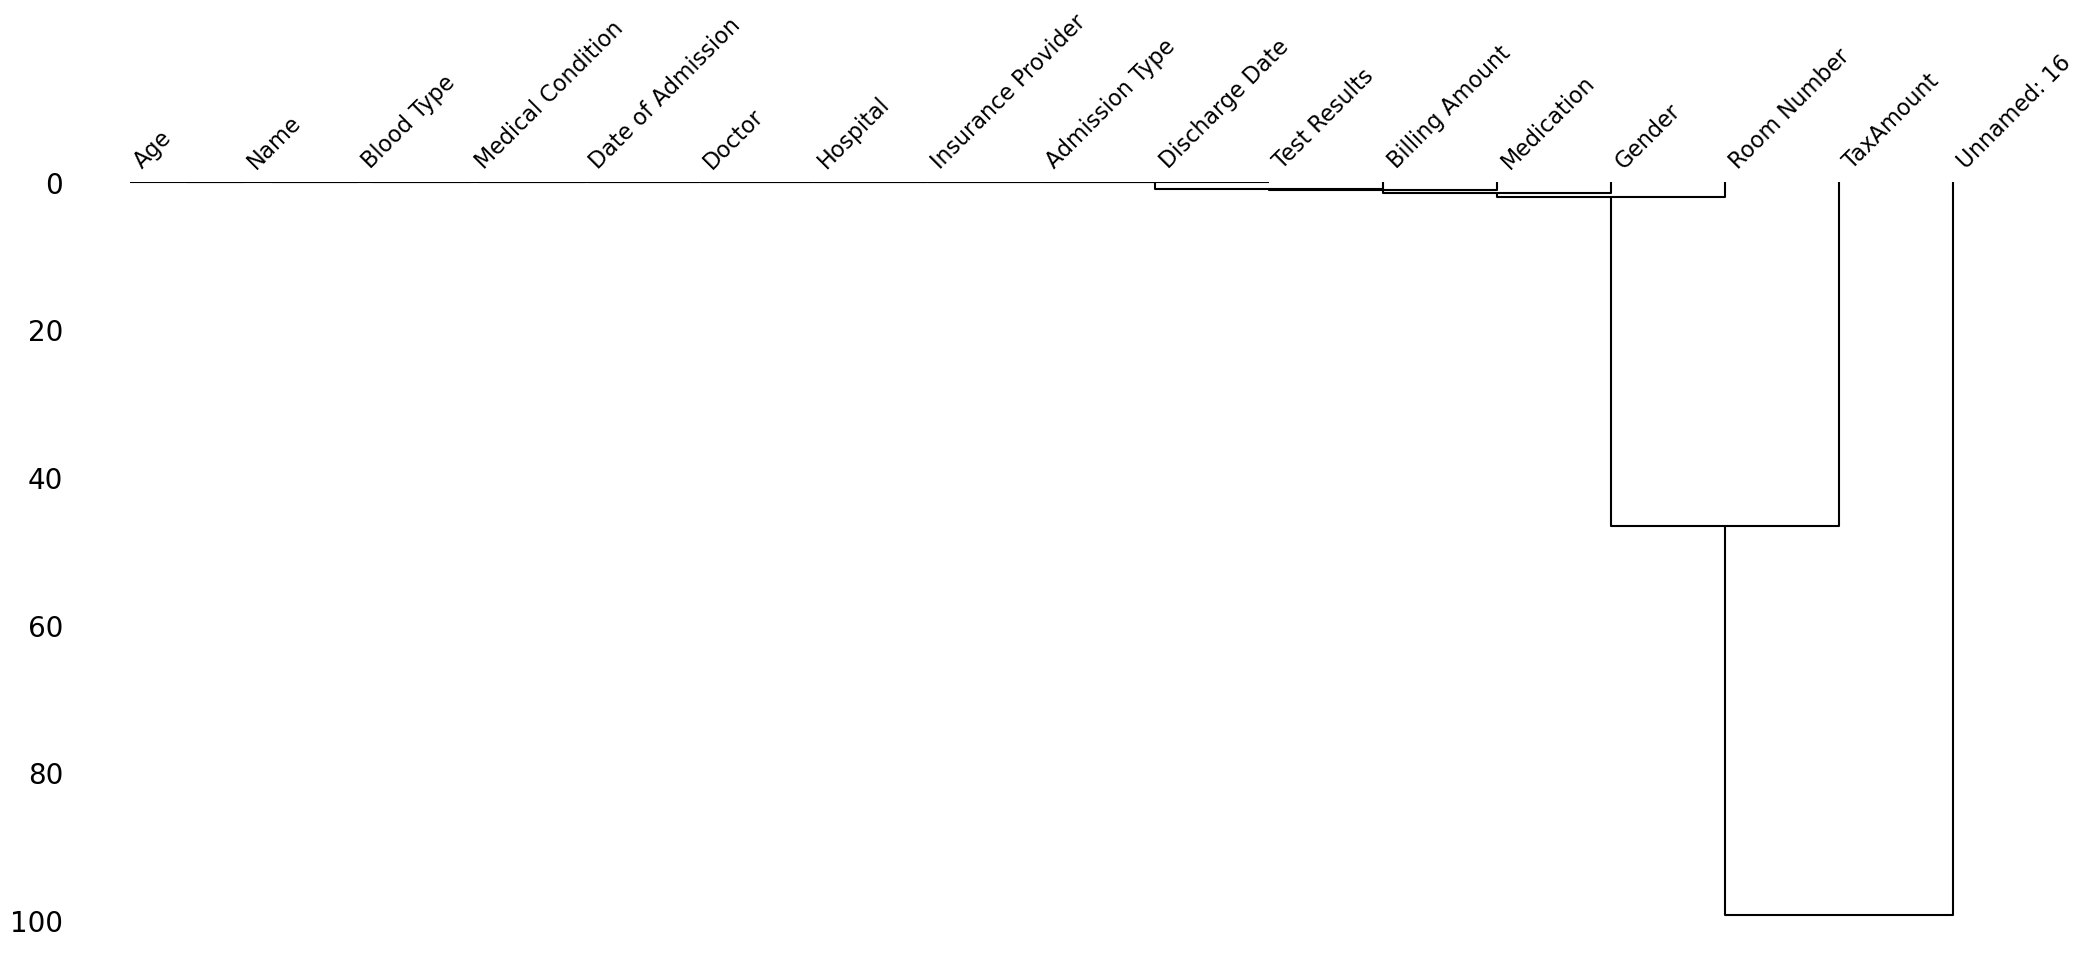

In [9]:
#dendogram will quantify and cluster the missingness
mano.dendrogram(Data)


Both the heatmap and Dendrogram show that most columns have no correlation in missing values, except for Billing Amount and Tax Amount, which exhibit a perfect positive correlation of 1.

Considering the small number of missing values in the following columns, We can safely drop these rows directly.
- Gender(2)
- Billing Amount(1)
- Room Number(4)
- Medication(1)

In [10]:
Data = Data.dropna(subset=['Gender', 'Billing Amount', 'Room Number', 'Medication'])

In [11]:
#Handling Tax Amount it has more number of missing values
correlation = Data['Billing Amount'].corr(Data['TaxAmount'])
correlation

1.0

correlation = 1. Which means there exists perfect positive linear relationship between the two columns so, this is MNAR case.
values in TaxAmount can be completely predicted by the values Billing Amount.

From the Data it is found that Billing Amount / TaxAmount  = 6.66667
so we can fill out the missing values in TaxAmout by the value Billing Amount /6.66667



In [12]:
Data['Tax Amount'] = Data['Billing Amount'] / 6.66667
Data.drop(columns=['TaxAmount'], inplace=True)



In [13]:
Data.isnull().sum()

Name                      0
Age                       0
Gender                    0
Blood Type                0
Medical Condition         0
Date of Admission         0
Doctor                    0
Hospital                  0
Insurance Provider        0
Billing Amount            0
Room Number               0
Admission Type            0
Discharge Date            0
Medication                0
Test Results              0
Unnamed: 16           10002
Tax Amount                0
dtype: int64

# Handling Data Inconsistancy

The following Columns Contain data inconsistancy:
- Medical Condition
- Insurance Provider
- Admission Type
- Test Results

In [14]:
Data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Unnamed: 16', 'Tax Amount'],
      dtype='object')

In [15]:
Data["Medical Condition"].unique()

array(['Obesity', 'Asthma', 'Arthritis', 'Hypertension', 'Diabetes',
       'Cancer', 'Hypertensions'], dtype=object)

Hypertension is miss spelled so replacing it with the correct one

In [16]:
Data["Medical Condition"].value_counts()

Medical Condition
Asthma           1715
Cancer           1709
Hypertension     1695
Arthritis        1654
Obesity          1634
Diabetes         1626
Hypertensions       1
Name: count, dtype: int64

In [17]:
Data['Medical Condition'].replace({'Hypertensions': 'Hypertension'}, inplace=True)


In [18]:
Data["Medical Condition"].unique()

array(['Obesity', 'Asthma', 'Arthritis', 'Hypertension', 'Diabetes',
       'Cancer'], dtype=object)

In [19]:
Data["Insurance Provider"].unique()

array(['Medicare', 'UnitedHealthcare', 'Aetna', 'Cigna', 'Blue Cross',
       'Blue Crosser', 'Blue Crossss'], dtype=object)

Blue Cross is miss spelled as Blue Crosser and Blue Crossss. Replacing it with the correct one

In [20]:
Data['Insurance Provider'].replace({'Blue Crosser': 'Blue Cross', 'Blue Crossss' : 'Blue Cross' }, inplace=True)
Data["Insurance Provider"].value_counts()

Insurance Provider
Cigna               2048
Aetna               2035
Blue Cross          2034
UnitedHealthcare    1983
Medicare            1934
Name: count, dtype: int64

In [21]:
Data["Admission Type"].unique()

array(['Emergency', 'Urgent', 'Elective', 'Electivess', 'Emergecn. ',
       'ELECTIvess'], dtype=object)

Multiple categories are miss spelled replacing them with correcect spelling.

In [22]:
Data['Admission Type'].replace({'Electivess': 'Elective', 'ELECTIvess' : 'Elective', 'Emergecn. ' : 'Emergency' }, inplace=True)
Data['Admission Type'].value_counts()

Admission Type
Urgent       3408
Emergency    3374
Elective     3252
Name: count, dtype: int64

In [23]:
Data["Test Results"].unique()

array(['Normal', 'Abnormal', 'Abnormall', 'Inconclusive', 'Normalll',
       'Inconclusiveity'], dtype=object)

Multiple categories are miss spelled replacing them with correcect spelling.

In [24]:
Data['Test Results'].replace({'Inconclusiveity': 'Inconclusive', 'Normalll' : 'Normal', 'Abnormall' : 'Abnormal' }, inplace=True)
Data['Test Results'].value_counts()

Test Results
Abnormal        3466
Inconclusive    3288
Normal          3280
Name: count, dtype: int64

In [25]:
Data.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number           float64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
Unnamed: 16            object
Tax Amount            float64
dtype: object

In [26]:
#Removing Dupicated Data
Data = Data.drop_duplicates()

In [27]:
Data.duplicated().value_counts()

False    9992
Name: count, dtype: int64

In [28]:
Data.isnull().sum()

Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                   0
Hospital                 0
Insurance Provider       0
Billing Amount           0
Room Number              0
Admission Type           0
Discharge Date           0
Medication               0
Test Results             0
Unnamed: 16           9960
Tax Amount               0
dtype: int64

# Exploratory Data Analysis

In [29]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
Data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Unnamed: 16', 'Tax Amount'],
      dtype='object')

# Univariate Analysis


**Age : Numerical**


(array([1031., 1041., 1046.,  872.,  959., 1057.,  917., 1007., 1089.,
         973.]),
 array([18. , 24.7, 31.4, 38.1, 44.8, 51.5, 58.2, 64.9, 71.6, 78.3, 85. ]),
 <BarContainer object of 10 artists>)

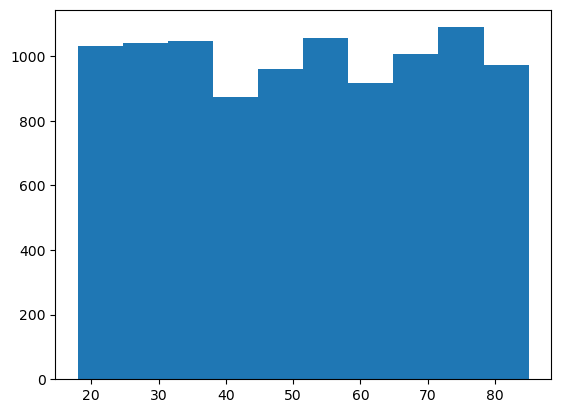

In [32]:

#Histogram
plt.hist(Data['Age'],bins=10)


The data points for the age column are uniformly distributed, suggesting an even spread of ages around the central value. This uniformity implies that there is no significant skewness or bias towards particular age groups within the dataset.

C:\Users\HP\AppData\Local\Temp\ipykernel_8264\2692257660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

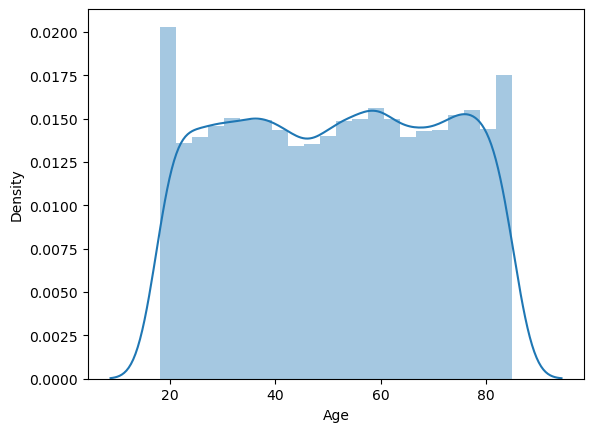

In [33]:
sns.distplot(Data['Age'])

<Axes: ylabel='Age'>

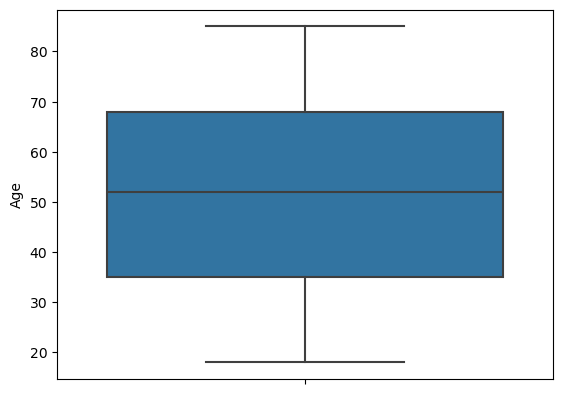

In [34]:
#Box Plot
sns.boxplot(y= Data['Age'])

The age distribution appears to be uniform, with no outliers detected within the dataset.













**Gender : Categorical**


<Axes: xlabel='Gender', ylabel='Count'>

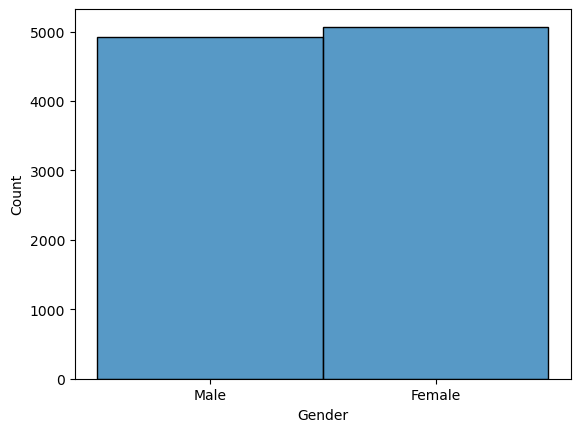

In [35]:
#Gender : Categorical
sns.histplot(Data["Gender"])

The dataset exhibits a nearly equal distribution of male and female patients.


<Axes: ylabel='count'>

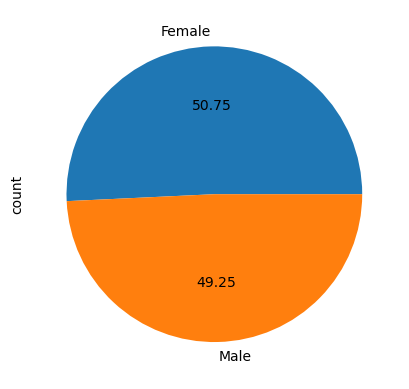

In [36]:
Data['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

The number of Male and Female Patients are almost equal.

**Blood Type : Categorical**

<Axes: xlabel='Blood Type', ylabel='Count'>

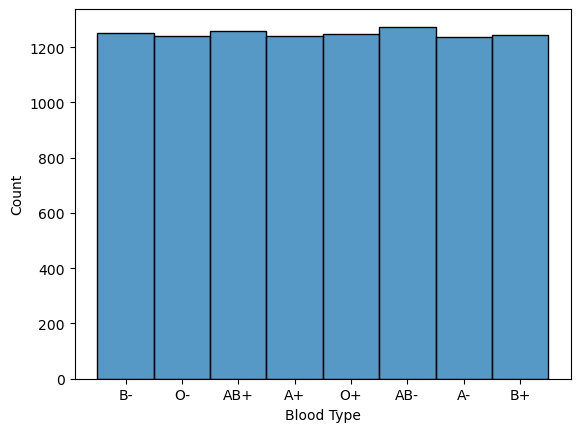

In [37]:
#Blood Type : Categorical
sns.histplot(x = Data["Blood Type"])

The dataset shows a nearly equal distribution of patients across different blood groups.







**Medical Condition : Categorical**

<Axes: xlabel='Medical Condition', ylabel='Count'>

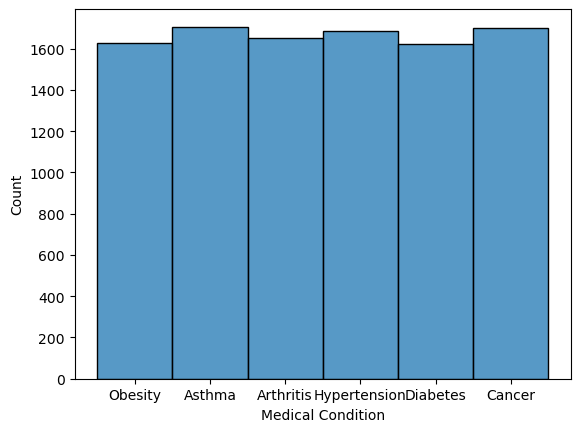

In [38]:

sns.histplot(Data["Medical Condition"])

<Axes: ylabel='count'>

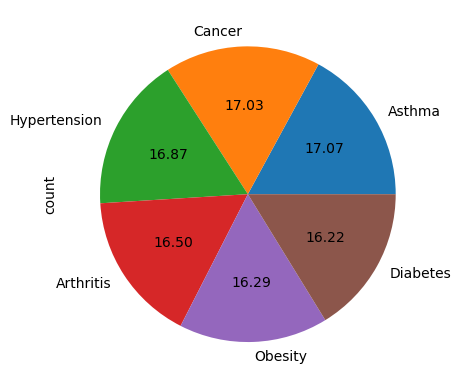

In [39]:
Data['Medical Condition'].value_counts().plot(kind='pie',autopct='%.2f')

The dataset shows a nearly equal distribution of patients across different Medical Conditions.


**Insurance Provider : Categorical**


<Axes: xlabel='Insurance Provider', ylabel='Count'>

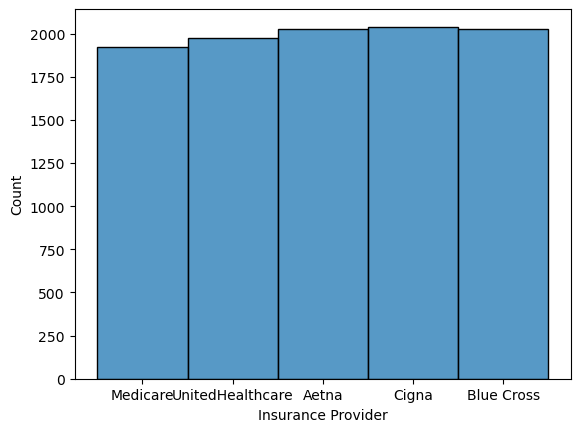

In [40]:
sns.histplot(Data["Insurance Provider"])

<Axes: ylabel='count'>

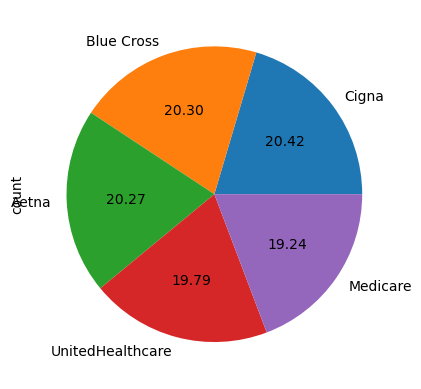

In [41]:
Data['Insurance Provider'].value_counts().plot(kind='pie',autopct='%.2f')

The dataset shows a nearly equal distribution of patients across different Insurance Providers.


**Billing Amount : Numerical**

(array([ 803.,  979., 1008., 1099., 1048., 1038.,  980., 1010.,  986.,
        1041.]),
 array([3.00000000e+00, 5.00229023e+03, 1.00015805e+04, 1.50008707e+04,
        2.00001609e+04, 2.49994511e+04, 2.99987414e+04, 3.49980316e+04,
        3.99973218e+04, 4.49966121e+04, 4.99959023e+04]),
 <BarContainer object of 10 artists>)

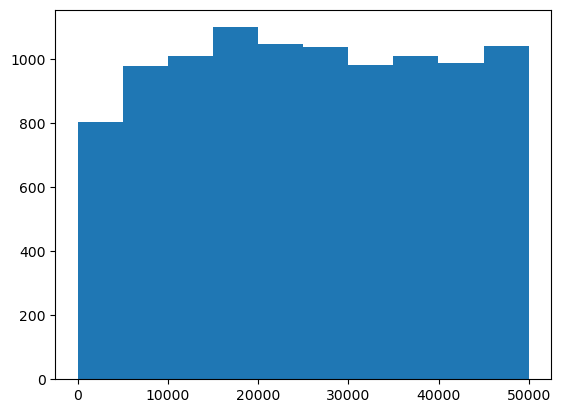

In [42]:

plt.hist(Data['Billing Amount'],bins=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_8264\2200073908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Billing Amount'])


<Axes: xlabel='Billing Amount', ylabel='Density'>

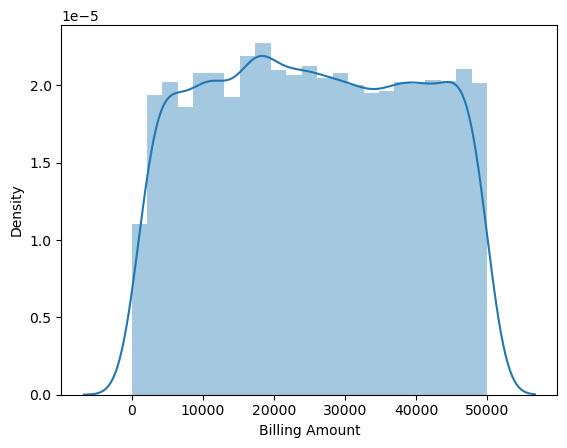

In [43]:
sns.distplot(Data['Billing Amount'])

<Axes: ylabel='Billing Amount'>

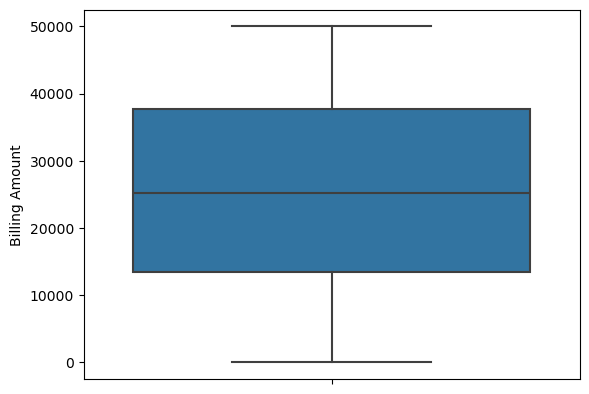

In [44]:
sns.boxplot(y= Data['Billing Amount'])

The data points for the Billing Amount column are uniformly distributed, suggesting an even spread of Billings around the central value. This uniformity implies that there is no significant skewness or bias towards particular age groups within the dataset.
Additionally, there are no outliers in Billing Amount.

**Admission Type : Categorical**

<Axes: xlabel='Admission Type', ylabel='Count'>

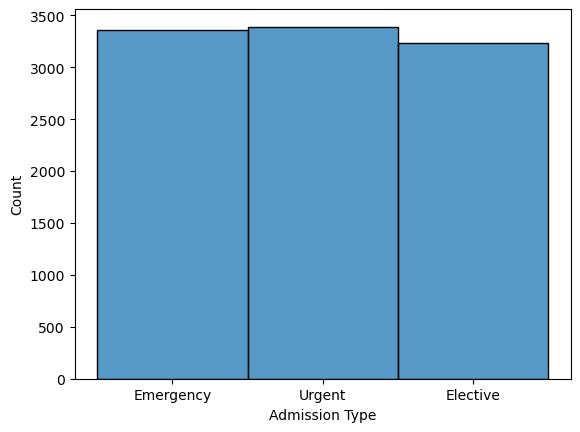

In [45]:

sns.histplot(Data["Admission Type"])

<Axes: ylabel='count'>

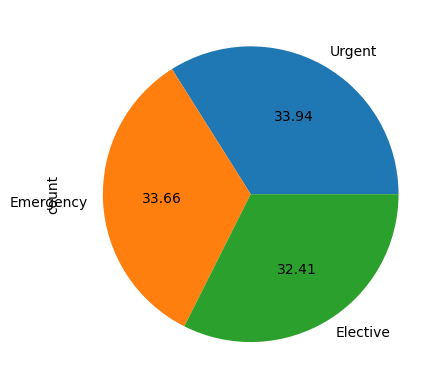

In [46]:
Data['Admission Type'].value_counts().plot(kind='pie',autopct='%.2f')

The dataset shows a nearly equal distribution of patients across different Admission Types.


**Medication: Categorical**

<Axes: xlabel='Medication', ylabel='Count'>

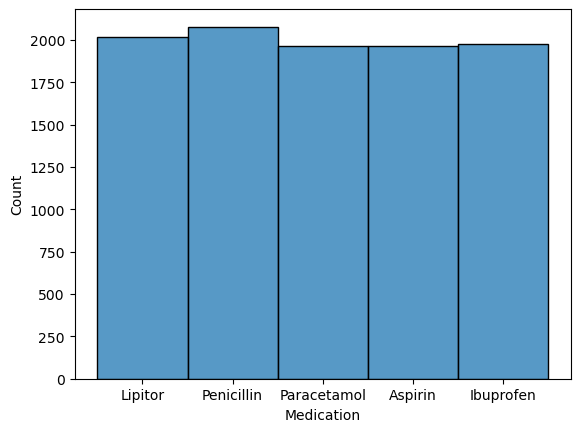

In [47]:

sns.histplot(Data["Medication"])

<Axes: ylabel='count'>

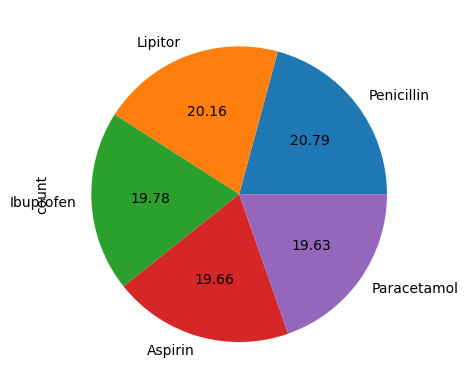

In [48]:
Data['Medication'].value_counts().plot(kind='pie',autopct='%.2f')

The dataset shows a nearly equal distribution of patients across different Medications.


**Test Results: Categorcal** 


<Axes: xlabel='Test Results', ylabel='Count'>

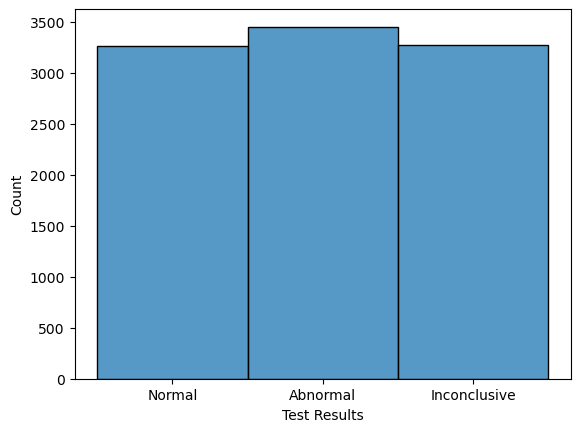

In [49]:
sns.histplot(Data["Test Results"])

<Axes: ylabel='count'>

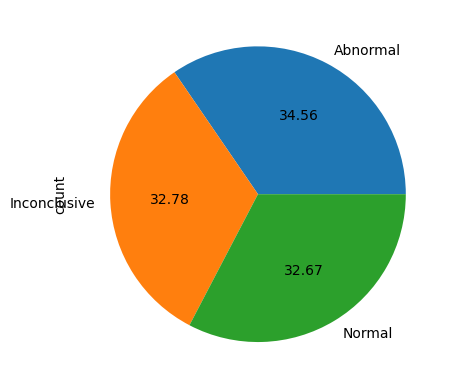

In [50]:
Data['Test Results'].value_counts().plot(kind='pie',autopct='%.2f')

The dataset shows a nearly equal distribution of patients across different Test Results.


**Tax Amount : Numerical**

(array([ 803.,  979., 1008., 1099., 1048., 1038.,  980., 1010.,  986.,
        1041.]),
 array([4.49999775e-01, 7.50343159e+02, 1.50023632e+03, 2.25012948e+03,
        3.00002264e+03, 3.74991580e+03, 4.49980896e+03, 5.24970211e+03,
        5.99959527e+03, 6.74948843e+03, 7.49938159e+03]),
 <BarContainer object of 10 artists>)

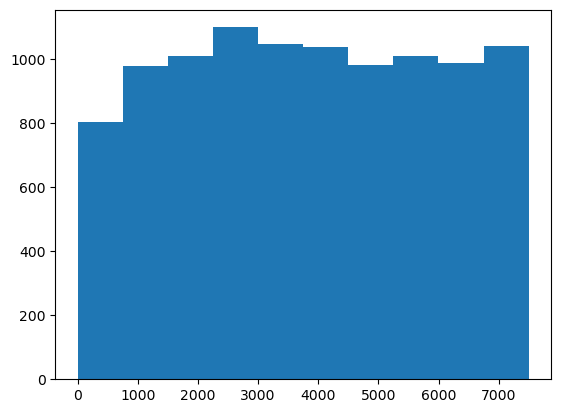

In [51]:
plt.hist(Data['Tax Amount'],bins=10)

C:\Users\HP\AppData\Local\Temp\ipykernel_8264\2200073908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Billing Amount'])


<Axes: xlabel='Billing Amount', ylabel='Density'>

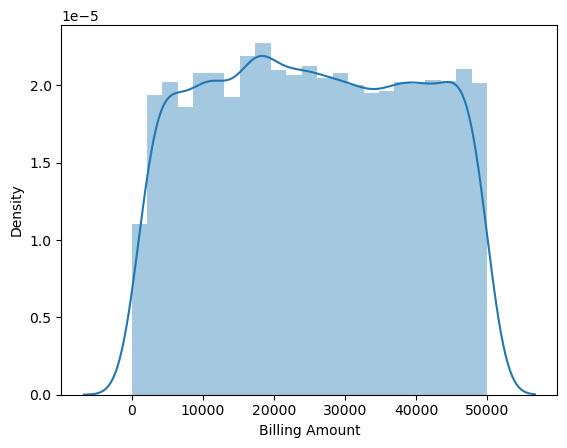

In [52]:
sns.distplot(Data['Billing Amount'])

<Axes: ylabel='Tax Amount'>

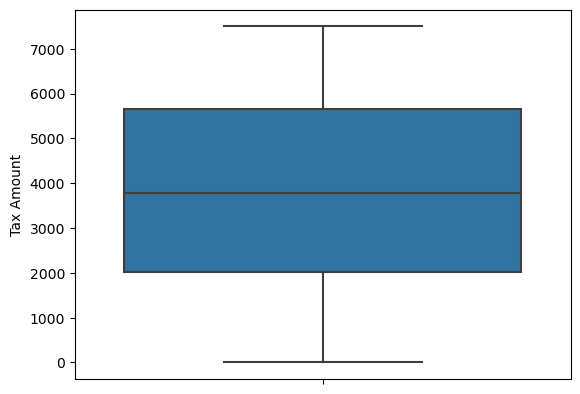

In [53]:
sns.boxplot(y= Data['Tax Amount'])

The data points for the Tax Amount column are uniformly distributed, suggesting an even spread of Taxess around the central value. This uniformity implies that there is no significant skewness or bias towards particular age groups within the dataset.
Additionally, there are no outliers in Tax Amount.

# Biivariate Analysis

In [54]:
Data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Unnamed: 16', 'Tax Amount'],
      dtype='object')

In [55]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Annova Test

**Billing Amount - Blood Type**

In [56]:
model = ols('Data["Billing Amount"] ~ C(Q("Blood Type"))', data=Data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA: Billing Amount - Blood Type")
display(anova_table)


ANOVA: Billing Amount - Blood Type


,sum_sq,df,F,PR(>F)
"C(Q(""Blood Type""))",1.881342e+09,7.0,1.358258,0.21836
Residual,1.975568e+12,9984.0,NaN,NaN



With a p-value greater than 0.05, the ANOVA results suggest that we lack substantial evidence to reject the null hypothesis. Consequently, there appears to be no significant relationship between Billing Amount andBlood Types means.

**Billing Amount - Medical Condition**

In [57]:
model = ols('Data["Billing Amount"] ~ C(Q("Medical Condition"))', data=Data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA: Billing Amount - Medical Condition")
display(anova_table)


ANOVA: Billing Amount - Medical Condition


,sum_sq,df,F,PR(>F)
"C(Q(""Medical Condition""))",8.679129e+08,5.0,0.876966,0.49548
Residual,1.976582e+12,9986.0,NaN,NaN


The ANOVA test results indicate that the p-value, which exceeds 0.05, provides insufficient evidence to reject the null hypothesis. This implies that there is no significant association between Billing Amount and Medical Condition means.

**Billing Amount - Insurance Provider**

In [58]:
model = ols('Data["Billing Amount"] ~ C(Q("Insurance Provider"))', data=Data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA: Billing Amount - Insurance Provider")
display(anova_table)


ANOVA: Billing Amount - Insurance Provider


,sum_sq,df,F,PR(>F)
"C(Q(""Insurance Provider""))",8.280568e+08,4.0,1.045952,0.38176
Residual,1.976622e+12,9987.0,NaN,NaN


The ANOVA test results indicate that the p-value, which exceeds 0.05, provides insufficient evidence to reject the null hypothesis. This implies that there is no significant association between Billing Amount and Insurance Provider means.

**Billing Amount - Admission Type**

In [59]:
model = ols('Data["Billing Amount"] ~ C(Q("Admission Type"))', data=Data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA: Billing Amount - Admission Type")
display(anova_table)


ANOVA: Billing Amount - Admission Type


,sum_sq,df,F,PR(>F)
"C(Q(""Admission Type""))",3.349972e+09,2.0,8.475477,0.00021
Residual,1.974100e+12,9989.0,NaN,NaN


The ANOVA results for Billing Amount and Admission Type reveal a significant relationship (p < 0.05) between the two variables, indicating that different Admission Types have a notable impact on Billing Amount.

**Billing Amount - Medication**

In [60]:
model = ols('Data["Billing Amount"] ~ C(Q("Medication"))', data=Data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA: Billing Amount - Medication")
display(anova_table)


ANOVA: Billing Amount - Medication


,sum_sq,df,F,PR(>F)
"C(Q(""Medication""))",1.585720e+09,4.0,2.003755,0.091117
Residual,1.975864e+12,9987.0,NaN,NaN


The p-value exceeding 0.05 suggests insufficient evidence to reject the null hypothesis, implying no substantial association between Billing Amount and Medication means.

**Billing Amount - Test Results**

In [61]:
model = ols('Data["Billing Amount"] ~ C(Q("Test Results"))', data=Data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA: Billing Amount - Test Results")
display(anova_table)


ANOVA: Billing Amount - Test Results


,sum_sq,df,F,PR(>F)
"C(Q(""Test Results""))",1.722392e+08,2.0,0.435067,0.647233
Residual,1.977277e+12,9989.0,NaN,NaN


With a p-value of less than 0.05, we lack significant evidence to reject the null hypothesis. Therefore, we conclude that there is no significant relationship between the means of Billing Amount and Test Results.







# Chi-squared Tests

In [62]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2





  
  **Test Results - Blood Type**

In [63]:
# count of occurences of all combinations of the 2 columns
data_crosstab = pd.crosstab(Data['Test Results'], Data['Blood Type'], 
margins = False) 
print(data_crosstab) 


Blood Type     A+   A-  AB+  AB-   B+   B-   O+   O-
Test Results                                        
Abnormal      411  437  432  448  421  456  417  431
Inconclusive  403  391  427  425  424  390  427  388
Normal        427  410  399  401  398  406  402  421


In [64]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=14
[[428.86038831 427.82365893 434.73518815 440.26441153 429.55154123
  432.66172938 430.58827062 428.51481185]
 [406.75290232 405.76961569 412.32485989 417.56905524 407.40842674
  410.35828663 408.39171337 406.42514011]
 [405.38670937 404.40672538 410.93995196 416.16653323 406.04003203
  408.97998399 407.02001601 405.06004804]]
significance=0.050, p=0.720
Independent (fail to reject H0)


Given the p-value exceeding the threshold of 0.05, the analysis suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, we conclude that there is no significant relationship between the test results and Blood Groups.

  **Test Results - Medical Condition**

In [65]:
# count of occurences of all combinations of the 2 columns
data_crosstab = pd.crosstab(Data['Test Results'], Data['Medical Condition'], 
margins = False) 
print(data_crosstab) 


Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Test Results                                                                 
Abnormal                 555     622     576       536           602      562
Inconclusive             553     551     556       541           553      521
Normal                   541     533     570       544           531      545


In [66]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=10
[[569.85558447 589.55344275 588.17113691 560.17944355 582.64191353
  562.59847878]
 [540.47988391 559.16232986 557.85128102 531.30254203 552.60708567
  533.5968775 ]
 [538.66453163 557.28422738 555.97758207 529.51801441 550.7510008
  531.80464371]]
significance=0.050, p=0.643
Independent (fail to reject H0)


The p-value exceeding 0.05 suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, it indicates that there is no significant relationship between test results and Medical Condition.

  **Test Results - Insurance Provider**

In [67]:
# count of occurences of all combinations of the 2 columns
data_crosstab = pd.crosstab(Data['Test Results'], Data['Insurance Provider'], 
margins = False) 
print(data_crosstab) 

Insurance Provider  Aetna  Blue Cross  Cigna  Medicare  UnitedHealthcare
Test Results                                                            
Abnormal              698         698    697       658               702
Inconclusive          658         667    650       633               667
Normal                669         663    693       631               608


In [68]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=8
[[699.79233387 700.82906325 704.97598078 664.19795837 683.20466373]
 [663.71847478 664.70176141 668.63490793 629.95896717 647.98588871]
 [661.48919135 662.46917534 666.38911129 627.84307446 645.80944756]]
significance=0.050, p=0.735
Independent (fail to reject H0)


The p-value exceeding 0.05 suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, it indicates that there is no significant relationship between test results and Insurance Provider.

  **Test Results - Admission Type**

In [69]:
# count of occurences of all combinations of the 2 columns
data_crosstab = pd.crosstab(Data['Test Results'], Data['Admission Type'], 
margins = False) 
print(data_crosstab)

Admission Type  Elective  Emergency  Urgent
Test Results                               
Abnormal            1107       1155    1191
Inconclusive        1046       1123    1106
Normal              1085       1085    1094


In [70]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[1118.97658127 1162.17363891 1171.84977982]
 [1061.29403523 1102.26431145 1111.44165332]
 [1057.72938351 1098.56204964 1107.70856685]]
significance=0.050, p=0.706
Independent (fail to reject H0)


The p-value being greater than 0.05 indicates that we fail to reject the null hypothesis. This implies that there is no significant relationship between test results and Admission Type.

  **Test Results - Medication**

In [71]:
# count of occurences of all combinations of the 2 columns
data_crosstab = pd.crosstab(Data['Test Results'], Data['Medication'], 
margins = False) 
print(data_crosstab)

Medication    Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Test Results                                                      
Abnormal          652        680      721          685         715
Inconclusive      633        627      685          650         680
Normal            679        669      608          626         682


In [72]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=8
[[678.71216974 682.85908727 695.99099279 677.67544035 717.76230985]
 [643.72497998 647.6581265  660.11309047 642.74169335 680.76210969]
 [641.56285028 645.48278623 657.89591673 640.58286629 678.47558046]]
significance=0.050, p=0.197
Independent (fail to reject H0)


The p-value being greater than 0.05 indicates that we fail to reject the null hypothesis.
This implies that there is no significant relationship between test results and medication.

# Correlation heatmaps

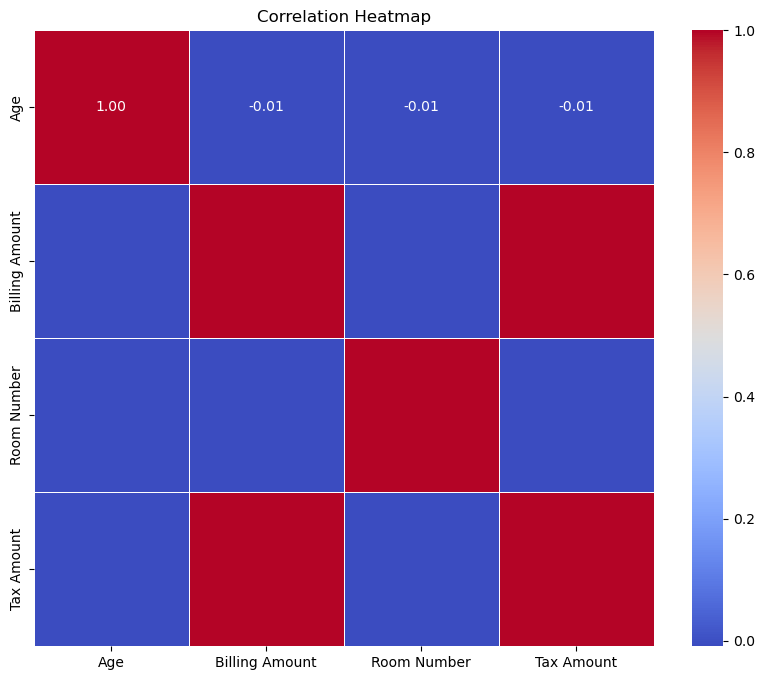

In [73]:
# Drop non-numeric columns
numeric_data = Data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


There is a perfect positive correlation between the Billing Amount and Tax Amount columns, while all other columns show no correlation.


In [75]:
Data.to_csv("Healthcare_clean.csv"  , index= False)

# Thank You :) 